# MLF_MPA : Project
## Classification of wireless transmitters

In [12]:
#librairies needed
import math
from keras.optimizers import *
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing  import OneHotEncoder


font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


### 1. Load the Dataset

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
path_to_y_train = '/content/drive/MyDrive/Colab Notebooks/y_train.csv' # My own PATH
y_train_dataset = pd.read_csv(path_to_y_train)


path_to_x_train = '/content/drive/MyDrive/Colab Notebooks/x_train.csv' # My own PATH
x_train_dataset = pd.read_csv(path_to_x_train)

path_to_x_test = '/content/drive/MyDrive/Colab Notebooks/x_test.csv' # My own PATH
x_test_dataset = pd.read_csv(path_to_x_test)

#remove double in each dataset
x_test_dataset = pd.get_dummies(x_test_dataset)
#y_train_dataset = pd.get_dummies(y_train_dataset)
x_train_dataset = pd.get_dummies(x_train_dataset)

### 2. Data Examination

In [15]:
#check x_train dataset
#x_train_dataset

After analyzing the datasets we have 12 features in total and 15360 samples in "x_train", which is a lot. We only have numeric datas in our dataset. Futhermore, we do not have any missing datas. Therefore, the best reprocessing steps appear to be the suppression of features that arer not needed like : the unnamed, m_power, Tosc, Tmix features.

In [16]:
#show X_test
#x_test_dataset


### 3. Preprocessing of the datas

In [17]:
#remove the non-necessary datas
x_train_dataset = x_train_dataset.drop(columns=['Unnamed: 0', 'm_power', 'Tosc', 'Tmix'])

#remove all missing data
x_train_dataset = x_train_dataset.dropna()

#remove the non-necessary datas
x_test_dataset = x_test_dataset.drop(columns=['Unnamed: 0', 'm_power', 'Tosc', 'Tmix'])
x_test_dataset.shape

#remove all missing data
x_test_dataset = x_test_dataset.dropna()


In [18]:
#check the shape of x_train dataset
x_train_dataset.shape

(15360, 8)

### 4. Hot encode

In [19]:
y_train_dataset_coded = to_categorical(y_train_dataset.iloc[: , 1:].to_numpy().reshape(1,-1)[0]-1) 
y_train_dataset = pd.DataFrame(y_train_dataset_coded)


In [20]:
#importance of each feature 
#my_importance_model = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
#my_importance_model.fit(x_train_dataset, y_train_dataset)
#print(my_importance_model.feature_importances_)

### 5. Train/Test Split

In [21]:
#split train + validation data 
x_train_dataset, x_test_dataset, y_train_dataset, y_test = train_test_split(x_train_dataset, y_train_dataset, test_size = 0.25, random_state=34)

# create scaler
scaler = StandardScaler()
x_test_dataset = scaler.fit_transform(x_test_dataset)

# create scaler
scaler = StandardScaler()
y_train_dataset = scaler.fit_transform(y_train_dataset)
y_train_dataset



array([[-0.37916338, -0.37465748, -0.3733004 , ..., -0.37495875,
         2.606591  , -0.37886387],
       [ 2.6373854 , -0.37465748, -0.3733004 , ..., -0.37495875,
        -0.38364285, -0.37886387],
       [-0.37916338, -0.37465748,  2.6788077 , ..., -0.37495875,
        -0.38364285, -0.37886387],
       ...,
       [-0.37916338, -0.37465748, -0.3733004 , ..., -0.37495875,
        -0.38364285, -0.37886387],
       [-0.37916338, -0.37465748, -0.3733004 , ..., -0.37495875,
         2.606591  , -0.37886387],
       [-0.37916338, -0.37465748, -0.3733004 , ..., -0.37495875,
         2.606591  , -0.37886387]], dtype=float32)

### 6. Creating the model

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense



# choosing model
model = Sequential()
model.add(Dense(120, input_dim=8, activation='relu', name="layer1"))
model.add(Dense(64, activation='relu', name="layer2"))
model.add(Dense(8, activation='softmax', name="layer3"))

#clf = svm.SVC()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x_train_dataset, y_train_dataset, batch_size=32, epochs=30, verbose=2, validation_data =(x_test_dataset, y_test))


Epoch 1/30
360/360 - 1s - loss: -2.5565e+04 - accuracy: 0.2821 - val_loss: 195.5142 - val_accuracy: 0.2599 - 1s/epoch - 4ms/step
Epoch 2/30
360/360 - 1s - loss: -4.5111e+05 - accuracy: 0.2528 - val_loss: 1319.4039 - val_accuracy: 0.2852 - 732ms/epoch - 2ms/step
Epoch 3/30
360/360 - 1s - loss: -1.9542e+06 - accuracy: 0.2519 - val_loss: 3723.9678 - val_accuracy: 0.2039 - 1s/epoch - 3ms/step
Epoch 4/30
360/360 - 1s - loss: -5.0502e+06 - accuracy: 0.2542 - val_loss: 7442.5654 - val_accuracy: 0.2911 - 785ms/epoch - 2ms/step
Epoch 5/30
360/360 - 1s - loss: -1.0124e+07 - accuracy: 0.2502 - val_loss: 12894.4355 - val_accuracy: 0.2128 - 884ms/epoch - 2ms/step
Epoch 6/30
360/360 - 1s - loss: -1.7487e+07 - accuracy: 0.2517 - val_loss: 19818.2012 - val_accuracy: 0.2953 - 706ms/epoch - 2ms/step
Epoch 7/30
360/360 - 1s - loss: -2.7349e+07 - accuracy: 0.2503 - val_loss: 28847.9375 - val_accuracy: 0.3956 - 676ms/epoch - 2ms/step
Epoch 8/30
360/360 - 1s - loss: -3.9533e+07 - accuracy: 0.2530 - val_loss

### 7. Model evaluation

In [23]:
score = model.evaluate(x_test_dataset, y_test)
print(f'Test accuracy: {score[1]*100} %')
print('Test loss:', score[0])

120/120 [==============================] - 0s 1ms/step - loss: 818065.8750 - accuracy: 0.3076
Test accuracy: 30.75520694255829 %
Test loss: 818065.875


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 120)               1080      
                                                                 
 layer2 (Dense)              (None, 64)                7744      
                                                                 
 layer3 (Dense)              (None, 8)                 520       
                                                                 
Total params: 9,344
Trainable params: 9,344
Non-trainable params: 0
_________________________________________________________________


### 8. Display loss function during the training process and accuracy

Text(0.5, 1.0, 'test accuracy')

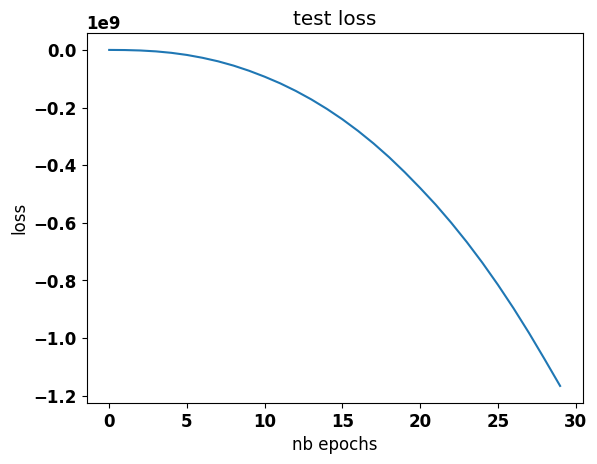

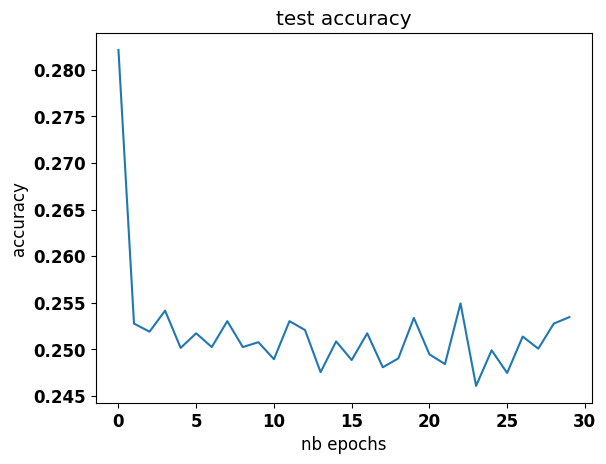

In [25]:
plt.figure()
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.xlabel('nb epochs')
plt.ylabel('loss')
plt.title('test loss')

# plt.figure()
# plt.plot(history.history['loss'])
# plt.xlabel('nb epochs')
# plt.ylabel('loss')

plt.figure()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.xlabel('nb epochs')
plt.ylabel('accuracy')
plt.title('test accuracy')

# plt.figure()
# plt.plot(history.history['accuracy'])
# plt.xlabel('nb epochs')
# plt.ylabel('accuracy')


### 9. Model predictions

In [26]:
y_test = model.predict(x_test_dataset)


120/120 [==============================] - 0s 1ms/step


In [27]:
y_test_pred = np.argmax(y_test,axis = 1) + 1
y_test_pred = pd.DataFrame(y_test_pred, columns=['target']).to_csv('/content/drive/MyDrive/Colab Notebooks/prediction.csv',index_label='id' )